In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond4.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:22 CET,1738.0,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07
1,2021-06-19 00:00:42 CET,1739.0,25.0000,81.0,6.888,8.51990,11.21030,672.0,75,6.94,3.07
2,2021-06-19 00:01:02 CET,1740.0,25.0000,81.0,33.728,8.51536,11.21030,671.0,75,6.94,3.07
3,2021-06-19 00:01:23 CET,1741.0,24.9375,81.0,10.531,8.52444,10.68908,668.0,75,6.94,3.07
4,2021-06-19 00:02:48 CET,1745.0,24.9375,81.0,11.740,8.52444,11.21030,683.0,75,6.94,3.07


In [4]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [5]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [6]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity           float64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate             float64
Population            int64
Fish_Length          object
Fish_Weight         float64
dtype: object

In [7]:
df_raw1.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Weight
count,89797.000000,89797.000000,89797.000000,89797.000000,89742.00000,89797.000000,89844.0,89844.000000
mean,24.778295,96.476040,8.046123,7.734694,inf,1227.156219,75.0,70.603810
std,0.806160,6.304591,8.269480,0.298076,NaN,587.272120,0.0,58.409334
min,-127.000000,80.000000,0.007000,-0.990280,0.00001,215.000000,75.0,3.070000
25%,24.375000,96.000000,3.123000,7.557530,0.00026,515.000000,75.0,16.320000
50%,24.750000,100.000000,5.525000,7.625620,61.82086,1423.000000,75.0,58.480000
75%,25.125000,100.000000,9.179000,7.825360,560.16553,1760.000000,75.0,109.520000
max,26.625000,100.000000,41.118000,15.451660,inf,3455.000000,75.0,826.000000


<AxesSubplot:>

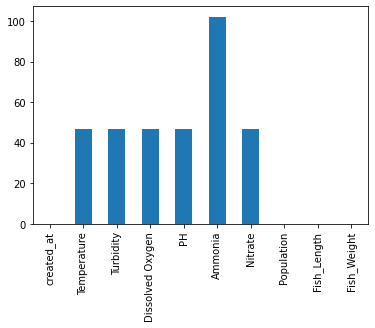

In [8]:
df_raw1.isna().sum().plot.bar()

Dropping records from index 89797 to 89843. For these indices, only 1 record is for each date and the weight is recorded. No sensor readings are available to reflect the water quality. 

In [9]:
df_raw1.drop(df_raw1.index[89797:89844], inplace=True)

In [10]:
df_raw1.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Weight
count,89797.000000,89797.000000,89797.000000,89797.000000,89742.00000,89797.000000,89797.0,89797.000000
mean,24.778295,96.476040,8.046123,7.734694,inf,1227.156219,75.0,70.358317
std,0.806160,6.304591,8.269480,0.298076,NaN,587.272120,0.0,57.359051
min,-127.000000,80.000000,0.007000,-0.990280,0.00001,215.000000,75.0,3.070000
25%,24.375000,96.000000,3.123000,7.557530,0.00026,515.000000,75.0,16.320000
50%,24.750000,100.000000,5.525000,7.625620,61.82086,1423.000000,75.0,58.480000
75%,25.125000,100.000000,9.179000,7.825360,560.16553,1760.000000,75.0,109.520000
max,26.625000,100.000000,41.118000,15.451660,inf,3455.000000,75.0,223.730000


In [11]:
df_raw1.tail(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
89792,2021-09-05 23:30:08 CET,24.5000,100.0,1.369,8.00240,0.00016,1864.0,75,28.96,223.73
89793,2021-09-05 23:33:35 CET,24.5000,100.0,0.904,7.97062,0.00016,1841.0,75,28.96,223.73
89794,2021-09-05 23:46:46 CET,24.5000,100.0,1.141,7.65286,0.00016,1853.0,75,28.96,223.73
89795,2021-09-05 23:47:06 CET,24.4375,100.0,1.343,7.63924,0.00016,1833.0,75,28.96,223.73
89796,2021-09-05 23:58:59 CET,24.5000,100.0,0.109,7.61654,0.00016,1931.0,75,28.96,223.73


<AxesSubplot:>

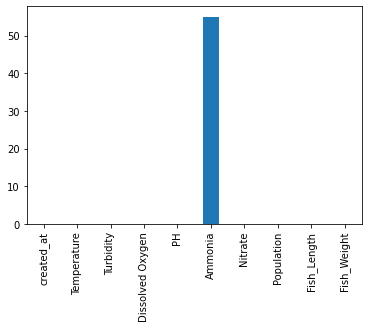

In [12]:
df_raw1.isna().sum().plot.bar()

In [13]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [14]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [15]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [16]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07,2021-06-19 00:00:22,2021-06-19,00:00:22
1,25.0000,81.0,6.888,8.51990,11.21030,672.0,75,6.94,3.07,2021-06-19 00:00:42,2021-06-19,00:00:42
2,25.0000,81.0,33.728,8.51536,11.21030,671.0,75,6.94,3.07,2021-06-19 00:01:02,2021-06-19,00:01:02
3,24.9375,81.0,10.531,8.52444,10.68908,668.0,75,6.94,3.07,2021-06-19 00:01:23,2021-06-19,00:01:23
4,24.9375,81.0,11.740,8.52444,11.21030,683.0,75,6.94,3.07,2021-06-19 00:02:48,2021-06-19,00:02:48


Sort DataFrame by Date (Datetime)

In [17]:
df=df_raw1.sort_values(by='Datetime') 

In [18]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [19]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Weight,Datetime
count,89797.0000,89797.0000,89797.0000,89797.0000,89742.0000,89797.0000,89797.0000,89797.0000,89797
mean,24.7783,96.4760,8.0461,7.7347,inf,1227.1562,75.0000,70.3583,2021-07-22 19:44:53.047128832
min,-127.0000,80.0000,0.0070,-0.9903,0.0000,215.0000,75.0000,3.0700,2021-06-19 00:00:22
25%,24.3750,96.0000,3.1230,7.5575,0.0003,515.0000,75.0000,16.3200,2021-07-04 03:16:52
50%,24.7500,100.0000,5.5250,7.6256,61.8209,1423.0000,75.0000,58.4800,2021-07-25 17:53:42
75%,25.1250,100.0000,9.1790,7.8254,560.1655,1760.0000,75.0000,109.5200,2021-08-07 19:11:47
max,26.6250,100.0000,41.1180,15.4517,inf,3455.0000,75.0000,223.7300,2021-09-05 23:58:59
std,0.8062,6.3046,8.2695,0.2981,nan,587.2721,0.0000,57.3591,NaN


We have 89798 records in total.  There are 55 records where Ammonia reading is missing and some noisy data too. Start date- 19th of June,'21 and end date- 5th of Sep,'21

In [27]:
d=df["Date"].unique()
print(len(d))
d

68


array([datetime.date(2021, 6, 19), datetime.date(2021, 6, 20),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),
       datetime.date(2021, 7, 2), datetime.date(2021, 7, 3),
       datetime.date(2021, 7, 4), datetime.date(2021, 7, 6),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 8),
       datetime.date(2021, 7, 9), datetime.date(2021, 7, 10),
       datetime.date(2021, 7, 11), datetime.date(2021, 7, 12),
       datetime.date(2021, 7, 13), datetime.date(2021, 7, 14),
       datetime.date(2021, 7, 15), datetime.date(2021, 7, 16),
       datetime.date(2021, 7, 17), datetime.date(2021, 7, 18),
       datetime.date(2021, 7, 19), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),
       datetime.date(2021, 7, 23), datetime.date(2021, 7, 24),

In [28]:
a=df["Fish_Weight"].unique()
print(len(a))
a

67


array([  3.07,   3.86,   4.65,   5.44,   6.23,   7.02,   7.81,  10.18,
        10.97,  11.76,  13.34,  14.1 ,  16.32,  20.76,  22.98,  25.2 ,
        27.42,  29.42,  31.64,  31.86,  32.08,  32.3 ,  32.52,  32.74,
        45.2 ,  47.09,  48.98,  50.87,  52.76,  54.65,  56.54,  58.48,
        60.37,  62.24,  64.13,  66.02,  71.6 ,  77.92,  84.24,  90.56,
        96.88, 103.2 , 109.52, 115.82, 122.16, 128.48, 134.8 , 141.12,
       147.44, 160.1 , 163.36, 166.62, 169.88, 173.14, 176.4 , 179.66,
       182.92, 186.18, 189.44, 205.8 , 208.36, 210.92, 213.48, 216.04,
       218.6 , 221.16, 223.73])

In [22]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
df.dropna(inplace=True)

In [26]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Weight,Datetime
count,89167.0000,89167.0000,89167.0000,89167.0000,89167.0000,89167.0000,89167.0000,89167.0000,89167
mean,24.7764,96.4522,8.0025,7.7352,292281095.7240,1231.8452,75.0000,70.6099,2021-07-22 21:20:33.324537088
min,-127.0000,80.0000,0.0070,-0.9903,0.0000,357.0000,75.0000,3.0700,2021-06-19 00:00:22
25%,24.3125,96.0000,3.1200,7.5575,0.0002,518.0000,75.0000,16.3200,2021-07-04 01:32:28
50%,24.7500,100.0000,5.5100,7.6211,60.3982,1425.0000,75.0000,58.4800,2021-07-25 19:52:55
75%,25.1250,100.0000,9.1190,7.8254,549.4727,1762.0000,75.0000,109.5200,2021-08-07 20:48:14
max,26.6250,100.0000,41.1180,15.4517,427000000000.0000,3455.0000,75.0000,223.7300,2021-09-05 23:58:59
std,0.8077,6.3202,8.2258,0.2990,9240848301.4064,586.2047,0.0000,57.4778,NaN


In [30]:
date_group=df.groupby("Date", sort = False)

In [32]:
for i in range(len(date_group)):
    print(i,'------> ',d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())

0 ------>  2021-06-19 ----------->  [3.07]
1 ------>  2021-06-20 ----------->  [3.86]
2 ------>  2021-06-21 ----------->  [4.65]
3 ------>  2021-06-22 ----------->  [5.44]
4 ------>  2021-06-23 ----------->  [6.23]
5 ------>  2021-06-24 ----------->  [7.02]
6 ------>  2021-06-25 ----------->  [7.81]
7 ------>  2021-06-28 ----------->  [10.18]
8 ------>  2021-06-29 ----------->  [10.97]
9 ------>  2021-06-30 ----------->  [11.76]
10 ------>  2021-07-02 ----------->  [13.34]
11 ------>  2021-07-03 ----------->  [14.1]
12 ------>  2021-07-04 ----------->  [16.32]
13 ------>  2021-07-06 ----------->  [20.76]
14 ------>  2021-07-07 ----------->  [22.98]
15 ------>  2021-07-08 ----------->  [25.2]
16 ------>  2021-07-09 ----------->  [27.42]
17 ------>  2021-07-10 ----------->  [29.42]
18 ------>  2021-07-11 ----------->  [31.64]
19 ------>  2021-07-12 ----------->  [31.86]
20 ------>  2021-07-13 ----------->  [32.08]
21 ------>  2021-07-14 ----------->  [32.3]
22 ------>  2021-07-15 -------

2021-07-21 ----------->  52.76

2021-07-22 ----------->  52.76

No weight changes.

In [33]:
#Fixing the weight to keep the weight readings intact.
df.loc[df["Date"] == d[27], "Fish_Weight"] = 50.87
df.loc[df["Date"] == d[49], "Fish_Weight"] = 147.44

In [34]:
for i in range(len(date_group)):
    print(i,'------> ',d[i],'-----------> ',date_group.get_group(d[i])["Fish_Weight"].unique())

0 ------>  2021-06-19 ----------->  [3.07]
1 ------>  2021-06-20 ----------->  [3.86]
2 ------>  2021-06-21 ----------->  [4.65]
3 ------>  2021-06-22 ----------->  [5.44]
4 ------>  2021-06-23 ----------->  [6.23]
5 ------>  2021-06-24 ----------->  [7.02]
6 ------>  2021-06-25 ----------->  [7.81]
7 ------>  2021-06-28 ----------->  [10.18]
8 ------>  2021-06-29 ----------->  [10.97]
9 ------>  2021-06-30 ----------->  [11.76]
10 ------>  2021-07-02 ----------->  [13.34]
11 ------>  2021-07-03 ----------->  [14.1]
12 ------>  2021-07-04 ----------->  [16.32]
13 ------>  2021-07-06 ----------->  [20.76]
14 ------>  2021-07-07 ----------->  [22.98]
15 ------>  2021-07-08 ----------->  [25.2]
16 ------>  2021-07-09 ----------->  [27.42]
17 ------>  2021-07-10 ----------->  [29.42]
18 ------>  2021-07-11 ----------->  [31.64]
19 ------>  2021-07-12 ----------->  [31.86]
20 ------>  2021-07-13 ----------->  [32.08]
21 ------>  2021-07-14 ----------->  [32.3]
22 ------>  2021-07-15 -------

In [35]:
df.to_csv('Pond4.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [37]:
df= pd.read_csv("Pond4.csv", delimiter = ",",low_memory=False )

In [38]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [39]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07,2021-06-19 00:00:22,2021-06-19,00:00:22
1,25.0000,81.0,6.888,8.51990,11.21030,672.0,75,6.94,3.07,2021-06-19 00:00:42,2021-06-19,00:00:42
2,25.0000,81.0,33.728,8.51536,11.21030,671.0,75,6.94,3.07,2021-06-19 00:01:02,2021-06-19,00:01:02
3,24.9375,81.0,10.531,8.52444,10.68908,668.0,75,6.94,3.07,2021-06-19 00:01:23,2021-06-19,00:01:23
4,24.9375,81.0,11.740,8.52444,11.21030,683.0,75,6.94,3.07,2021-06-19 00:02:48,2021-06-19,00:02:48


In [40]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [41]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07,2021-06-19 00:00:22,2021-06-19,00:00:22,NaT
1,25.0000,81.0,6.888,8.51990,11.21030,672.0,75,6.94,3.07,2021-06-19 00:00:42,2021-06-19,00:00:42,0 days
2,25.0000,81.0,33.728,8.51536,11.21030,671.0,75,6.94,3.07,2021-06-19 00:01:02,2021-06-19,00:01:02,0 days
3,24.9375,81.0,10.531,8.52444,10.68908,668.0,75,6.94,3.07,2021-06-19 00:01:23,2021-06-19,00:01:23,0 days
4,24.9375,81.0,11.740,8.52444,11.21030,683.0,75,6.94,3.07,2021-06-19 00:02:48,2021-06-19,00:02:48,0 days


In [42]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [43]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [44]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07,2021-06-19 00:00:22,2021-06-19,00:00:22,0.0
1,25.0000,81.0,6.888,8.51990,11.21030,672.0,75,6.94,3.07,2021-06-19 00:00:42,2021-06-19,00:00:42,0.0
2,25.0000,81.0,33.728,8.51536,11.21030,671.0,75,6.94,3.07,2021-06-19 00:01:02,2021-06-19,00:01:02,0.0
3,24.9375,81.0,10.531,8.52444,10.68908,668.0,75,6.94,3.07,2021-06-19 00:01:23,2021-06-19,00:01:23,0.0
4,24.9375,81.0,11.740,8.52444,11.21030,683.0,75,6.94,3.07,2021-06-19 00:02:48,2021-06-19,00:02:48,0.0


In [45]:
df['Date_diff'].unique()

array([0., 1., 3., 2., 4.])

In [46]:
p=df[df['Date_diff']>=2]
p       

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
12923,25.1250,100.0,9.131,7.94792,2035.20056,414.0,75,10.09,10.18,2021-06-28 12:44:30,2021-06-28,12:44:30,3.0
18083,25.1875,100.0,8.922,7.83898,402.05814,478.0,75,12.45,13.34,2021-07-02 12:12:09,2021-07-02,12:12:09,2.0
24167,24.9375,99.0,15.797,7.77088,254.43057,527.0,75,12.39,20.76,2021-07-06 13:03:03,2021-07-06,13:03:03,2.0
53702,24.5000,100.0,8.925,7.50759,10.43820,1666.0,75,18.02,66.02,2021-07-30 09:48:21,2021-07-30,09:48:21,2.0
66021,25.0000,95.0,0.576,7.58023,0.00028,1706.0,75,21.83,109.52,2021-08-07 12:20:22,2021-08-07,12:20:22,2.0
84738,24.5625,94.0,7.708,7.52575,0.00008,1648.0,75,27.35,176.40,2021-08-20 14:51:33,2021-08-20,14:51:33,2.0
85978,25.1875,100.0,2.803,7.53029,0.00011,1387.0,75,29.07,189.44,2021-08-27 11:55:22,2021-08-27,11:55:22,4.0
88572,24.8125,100.0,3.228,7.45766,0.00009,1804.0,75,28.74,218.60,2021-09-03 14:48:32,2021-09-03,14:48:32,2.0


In [47]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [48]:
df['Weight_diff'].unique()

array([ 0.  ,  0.79,  0.79,  0.79,  2.37,  0.79,  1.58,  0.76,  2.22,
        4.44,  2.22,  2.22,  2.  ,  0.22,  0.22, 12.46,  1.89,  1.89,
        1.94,  1.87,  5.58,  6.32,  6.32,  6.3 ,  6.34,  6.32, 12.66,
        3.26,  3.26, 16.36,  2.56,  2.56,  2.57])

In [49]:
date_group=df.groupby("Date", sort = False)

In [50]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07,2021-06-19 00:00:22,00:00:22,0.0,0.00
2021-06-20,26.0000,81.0,0.807,8.37917,21.95605,617.0,75,7.28,3.86,2021-06-20 00:00:05,00:00:05,1.0,0.79
2021-06-21,25.8750,80.0,12.823,8.34286,67.89865,526.0,75,7.64,4.65,2021-06-21 00:00:01,00:00:01,1.0,0.79
2021-06-22,24.6875,82.0,7.742,8.26115,0.00082,943.0,75,7.96,5.44,2021-06-22 14:01:19,14:01:19,1.0,0.79
2021-06-23,24.8750,86.0,9.551,8.24299,1565.81189,509.0,75,8.4,6.23,2021-06-23 00:00:56,00:00:56,1.0,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,24.3750,100.0,2.789,15.45166,0.00024,2097.0,75,28.52,213.48,2021-08-31 07:20:21,07:20:21,1.0,2.56
2021-09-01,26.1875,100.0,2.299,7.54845,0.00015,2067.0,75,28.63,216.04,2021-09-01 00:01:14,00:01:14,1.0,2.56
2021-09-03,24.8125,100.0,3.228,7.45766,0.00009,1804.0,75,28.74,218.60,2021-09-03 14:48:32,14:48:32,2.0,2.56


Shifting the weight difference to the previous day recording since the weight recorded for the current day reflects previous day's water quality.

In [51]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],13]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,13])
    
    

0.79
0.7900000000000005
0.79
0.79
0.7899999999999991
0.79
2.37
0.7900000000000009
0.7899999999999991
1.58
0.7599999999999998
2.2200000000000006
4.440000000000001
2.219999999999999
2.219999999999999
2.2200000000000024
2.0
2.219999999999999
0.21999999999999886
0.21999999999999886
0.21999999999999886
0.22000000000000597
0.21999999999999886
12.46
1.8900000000000006
1.8899999999999935
1.8900000000000006
1.8900000000000006
0.0
1.8900000000000006
1.8900000000000006
1.9399999999999977
1.8900000000000006
1.8700000000000045
1.8899999999999935
1.8900000000000006
5.579999999999998
6.320000000000007
6.319999999999993
6.320000000000007
6.319999999999993
6.320000000000007
6.319999999999993
6.299999999999997
6.340000000000003
6.319999999999993
6.320000000000022
6.319999999999993
6.319999999999993
12.659999999999997
3.2600000000000193
3.259999999999991
3.259999999999991
3.259999999999991
3.2600000000000193
3.259999999999991
3.259999999999991
3.2600000000000193
3.259999999999991
16.360000000000014
2.560

In [52]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07,2021-06-19 00:00:22,00:00:22,0.0,0.79
2021-06-20,26.0000,81.0,0.807,8.37917,21.95605,617.0,75,7.28,3.86,2021-06-20 00:00:05,00:00:05,1.0,0.79
2021-06-21,25.8750,80.0,12.823,8.34286,67.89865,526.0,75,7.64,4.65,2021-06-21 00:00:01,00:00:01,1.0,0.79
2021-06-22,24.6875,82.0,7.742,8.26115,0.00082,943.0,75,7.96,5.44,2021-06-22 14:01:19,14:01:19,1.0,0.79
2021-06-23,24.8750,86.0,9.551,8.24299,1565.81189,509.0,75,8.4,6.23,2021-06-23 00:00:56,00:00:56,1.0,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,24.3750,100.0,2.789,15.45166,0.00024,2097.0,75,28.52,213.48,2021-08-31 07:20:21,07:20:21,1.0,2.56
2021-09-01,26.1875,100.0,2.299,7.54845,0.00015,2067.0,75,28.63,216.04,2021-09-01 00:01:14,00:01:14,1.0,2.56
2021-09-03,24.8125,100.0,3.228,7.45766,0.00009,1804.0,75,28.74,218.60,2021-09-03 14:48:32,14:48:32,2.0,2.56


In [53]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,12])
    if (df[df["Date"]==d[i]].iloc[0,12])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-19 ------ 1.0
2021-06-20 ------ 1.0
2021-06-21 ------ 1.0
2021-06-22 ------ 1.0
2021-06-23 ------ 1.0
2021-06-24 ------ 1.0
2021-06-25 ------ 3.0
2021-06-28 ------ 1.0
2021-06-29 ------ 1.0
2021-06-30 ------ 2.0
2021-07-02 ------ 1.0
2021-07-03 ------ 1.0
2021-07-04 ------ 2.0
2021-07-06 ------ 1.0
2021-07-07 ------ 1.0
2021-07-08 ------ 1.0
2021-07-09 ------ 1.0
2021-07-10 ------ 1.0
2021-07-11 ------ 1.0
2021-07-12 ------ 1.0
2021-07-13 ------ 1.0
2021-07-14 ------ 1.0
2021-07-15 ------ 1.0
2021-07-16 ------ 1.0
2021-07-17 ------ 1.0
2021-07-18 ------ 1.0
2021-07-19 ------ 1.0
2021-07-20 ------ 1.0
2021-07-21 ------ 1.0
2021-07-22 ------ 1.0
2021-07-23 ------ 1.0
2021-07-24 ------ 1.0
2021-07-25 ------ 1.0
2021-07-26 ------ 1.0
2021-07-27 ------ 1.0
2021-07-28 ------ 2.0
2021-07-30 ------ 1.0
2021-07-31 ------ 1.0
2021-08-01 ------ 1.0
2021-08-02 ------ 1.0
2021-08-03 ------ 1.0
2021-08-04 ------ 1.0
2021-08-05 ------ 2.0
2021-08-07 ------ 1.0
2021-08-08 ------ 1.0
2021-08-09

In [54]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,24.9375,81.0,7.945,8.51990,10.68908,688.0,75,6.94,3.07,2021-06-19 00:00:22,00:00:22,1.0,0.79
2021-06-20,26.0000,81.0,0.807,8.37917,21.95605,617.0,75,7.28,3.86,2021-06-20 00:00:05,00:00:05,1.0,0.79
2021-06-21,25.8750,80.0,12.823,8.34286,67.89865,526.0,75,7.64,4.65,2021-06-21 00:00:01,00:00:01,1.0,0.79
2021-06-22,24.6875,82.0,7.742,8.26115,0.00082,943.0,75,7.96,5.44,2021-06-22 14:01:19,14:01:19,1.0,0.79
2021-06-23,24.8750,86.0,9.551,8.24299,1565.81189,509.0,75,8.4,6.23,2021-06-23 00:00:56,00:00:56,1.0,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,24.3750,100.0,2.789,15.45166,0.00024,2097.0,75,28.52,213.48,2021-08-31 07:20:21,07:20:21,1.0,2.56
2021-09-01,26.1875,100.0,2.299,7.54845,0.00015,2067.0,75,28.63,216.04,2021-09-01 00:01:14,00:01:14,2.0,2.56
2021-09-03,24.8125,100.0,3.228,7.45766,0.00009,1804.0,75,28.74,218.60,2021-09-03 14:48:32,14:48:32,1.0,2.56


In [55]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 25),
 datetime.date(2021, 6, 30),
 datetime.date(2021, 7, 4),
 datetime.date(2021, 7, 28),
 datetime.date(2021, 8, 5),
 datetime.date(2021, 8, 18),
 datetime.date(2021, 8, 23),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 9, 5)]

In [56]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [57]:
df.tail(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff
88942,24.6250,100.0,0.169,7.50306,0.00016,1953.0,75,28.85,221.16,2021-09-04 23:39:33,2021-09-04,23:39:33,0.0,0.0
88943,24.6875,100.0,2.315,7.50306,0.00016,1926.0,75,28.85,221.16,2021-09-04 23:41:27,2021-09-04,23:41:27,0.0,0.0
88944,24.6250,100.0,1.225,7.50306,0.00017,1961.0,75,28.85,221.16,2021-09-04 23:43:40,2021-09-04,23:43:40,0.0,0.0
88945,24.5625,100.0,0.659,7.50759,0.00018,2012.0,75,28.85,221.16,2021-09-04 23:55:33,2021-09-04,23:55:33,0.0,0.0
88946,24.6250,100.0,3.702,7.50759,0.00016,2056.0,75,28.85,221.16,2021-09-04 23:57:43,2021-09-04,23:57:43,0.0,0.0


In [58]:
df.drop("Date_diff",axis=1,inplace=True)


In [59]:
df.to_csv('cleaned_Pond4.csv')